# **1.Team Name Normalization**
1 Some team names appear in different textual formats (e.g., case differences or extra
spaces). Clean the team1 and team2 columns by:

2. Converting text to lowercase
3. Removing leading/trailing spaces
4. Verifying unique team names after cleaning


In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [54]:
df=pd.read_csv('/content/drive/MyDrive/data.csv')
print(df)

      id  season        city        date                  team1  \
0      1    2008   Bangalore  2008-04-18  Kolkata Knight Riders   
1      2    2008  Chandigarh  2008-04-19    Chennai Super Kings   
2      3    2008       Delhi  2008-04-19       Rajasthan Royals   
3      4    2008      Mumbai  2008-04-20         Mumbai Indians   
4      5    2008     Kolkata  2008-04-20        Deccan Chargers   
..   ...     ...         ...         ...                    ...   
572  573    2016      Raipur  2016-05-22       Delhi Daredevils   
573  574    2016   Bangalore  2016-05-24          Gujarat Lions   
574  575    2016       Delhi  2016-05-25    Sunrisers Hyderabad   
575  576    2016       Delhi  2016-05-27          Gujarat Lions   
576  577    2016   Bangalore  2016-05-29    Sunrisers Hyderabad   

                           team2                  toss_winner toss_decision  \
0    Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1                Kings XI Punjab     

In [55]:
df.shape

(577, 18)

In [56]:
print(df['team1'], df['team2'])

0      Kolkata Knight Riders
1        Chennai Super Kings
2           Rajasthan Royals
3             Mumbai Indians
4            Deccan Chargers
               ...          
572         Delhi Daredevils
573            Gujarat Lions
574      Sunrisers Hyderabad
575            Gujarat Lions
576      Sunrisers Hyderabad
Name: team1, Length: 577, dtype: object 0      Royal Challengers Bangalore
1                  Kings XI Punjab
2                 Delhi Daredevils
3      Royal Challengers Bangalore
4            Kolkata Knight Riders
                  ...             
572    Royal Challengers Bangalore
573    Royal Challengers Bangalore
574          Kolkata Knight Riders
575            Sunrisers Hyderabad
576    Royal Challengers Bangalore
Name: team2, Length: 577, dtype: object


In [57]:
df['team1']=df['team1'].str.lower().str.strip() #.str.lower() to convert into lower case and space is removed
df['team2']=df['team2'].str.lower().str.lower()
print(df['team1'], df['team2'])


0      kolkata knight riders
1        chennai super kings
2           rajasthan royals
3             mumbai indians
4            deccan chargers
               ...          
572         delhi daredevils
573            gujarat lions
574      sunrisers hyderabad
575            gujarat lions
576      sunrisers hyderabad
Name: team1, Length: 577, dtype: object 0      royal challengers bangalore
1                  kings xi punjab
2                 delhi daredevils
3      royal challengers bangalore
4            kolkata knight riders
                  ...             
572    royal challengers bangalore
573    royal challengers bangalore
574          kolkata knight riders
575            sunrisers hyderabad
576    royal challengers bangalore
Name: team2, Length: 577, dtype: object


In [58]:
print(df['team1'].unique())
print(df['team2'].unique())

['kolkata knight riders' 'chennai super kings' 'rajasthan royals'
 'mumbai indians' 'deccan chargers' 'kings xi punjab'
 'royal challengers bangalore' 'delhi daredevils' 'kochi tuskers kerala'
 'pune warriors' 'sunrisers hyderabad' 'rising pune supergiants'
 'gujarat lions']
['royal challengers bangalore' 'kings xi punjab' 'delhi daredevils'
 'kolkata knight riders' 'rajasthan royals' 'mumbai indians'
 'chennai super kings' 'deccan chargers' 'pune warriors'
 'kochi tuskers kerala' 'sunrisers hyderabad' 'rising pune supergiants'
 'gujarat lions']


# **2.City Name Standardization**
Standardize the city column by:

1)Replacing missing city names with "Unknown"

2)Converting all city names to title case

3)Counting matches played in each city


In [59]:
print(df['city'].isnull().sum())

7


In [60]:
df['city'].fillna('Unknown', inplace=True)

/tmp/ipython-input-357195196.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['city'].fillna('Unknown', inplace=True)


In [61]:
df['city'] = df['city'].str.title()
print(df['city'])

0       Bangalore
1      Chandigarh
2           Delhi
3          Mumbai
4         Kolkata
          ...    
572        Raipur
573     Bangalore
574         Delhi
575         Delhi
576     Bangalore
Name: city, Length: 577, dtype: object


In [62]:
cmc=df['city'].value_counts()
print(cmc)

city
Mumbai            77
Bangalore         58
Kolkata           54
Delhi             53
Chennai           48
Chandigarh        42
Hyderabad         41
Jaipur            33
Pune              25
Durban            15
Centurion         12
Ahmedabad         12
Visakhapatnam     11
Dharamsala         9
Johannesburg       8
Unknown            7
Abu Dhabi          7
Cape Town          7
Port Elizabeth     7
Ranchi             7
Cuttack            7
Raipur             6
Sharjah            6
Rajkot             5
Kochi              5
Kimberley          3
East London        3
Nagpur             3
Bloemfontein       2
Indore             2
Kanpur             2
Name: count, dtype: int64


# **3. Toss Decision Text Analysis**
Analyze the toss_decision column:

1)Extract unique decisions

2)Count how many times each decision was taken

3)Visualize the frequency using a bar chart


In [63]:
ud=df['toss_decision'].unique()
print(ud)

['field' 'bat']


In [64]:
dc=df['toss_decision'].value_counts()
print("Frequency of each toss decision:")
print(dc)

Frequency of each toss decision:
toss_decision
field    315
bat      262
Name: count, dtype: int64


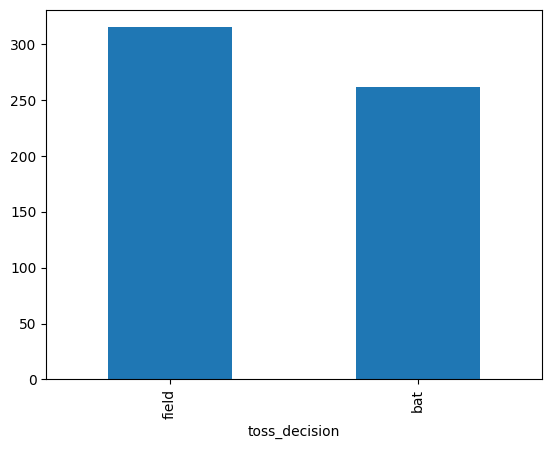

In [66]:
bar=df['toss_decision'].value_counts().plot(kind='bar')

# **4, Winner Name Extraction**
From the winner column:

1)Identify and remove rows where the match result was "No Result" or "Tie"

2)Count how many matches each team won after cleaning text values

In [71]:
df['result'].value_counts()

,count
result,
normal,568
tie,6
no result,3


In [72]:
df_filtered = df[~df['result'].isin(['no result', 'tie'])]
print(df_filtered)

Original number of matches: 577
Number of matches after removing 'No Result' and 'Tie': 568


In [74]:
team_wins = df_filtered['winner'].value_counts()
print(team_wins)

winner
Mumbai Indians                 80
Chennai Super Kings            79
Royal Challengers Bangalore    69
Kolkata Knight Riders          68
Rajasthan Royals               61
Kings XI Punjab                61
Delhi Daredevils               56
Sunrisers Hyderabad            33
Deccan Chargers                29
Pune Warriors                  12
Gujarat Lions                   9
Kochi Tuskers Kerala            6
Rising Pune Supergiants         5
Name: count, dtype: int64


# **5. Player of the Match Text Frequency**
Perform text analysis on player of the match:

1)Remove null values

2)Find the top 10 most frequent player names

3)Plot the results using a Seaborn bar plot

In [82]:
pn = df['player_of_match'].dropna()
print(pn)

0         BB McCullum
1          MEK Hussey
2         MF Maharoof
3          MV Boucher
4           DJ Hussey
            ...      
572           V Kohli
573    AB de Villiers
574      MC Henriques
575         DA Warner
576       BCJ Cutting
Name: player_of_match, Length: 574, dtype: object


In [83]:
tp=df['player_of_match'].value_counts().head(10)
print(tp)

player_of_match
CH Gayle          17
YK Pathan         16
AB de Villiers    15
DA Warner         14
RG Sharma         13
SK Raina          13
MEK Hussey        12
MS Dhoni          12
G Gambhir         12
AM Rahane         12
Name: count, dtype: int64


<Axes: ylabel='player_of_match'>

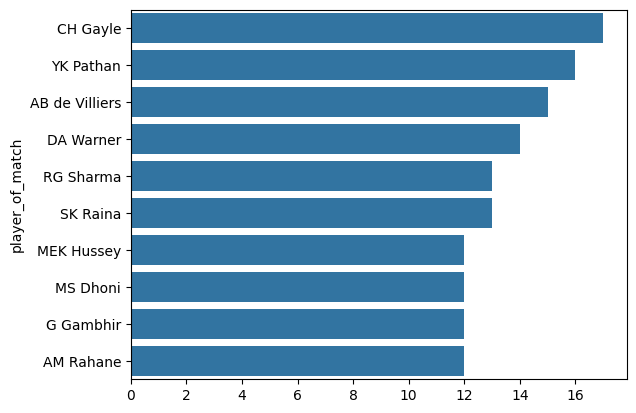

In [85]:
sns.barplot(y=tp.index, x=tp.values)

# 6. Venue Tokenization
Count how many matches were played in each venue and plot a bar chart for the top10.


In [87]:
venue_counts = df['venue'].value_counts()
print(venue_counts.head(10))

venue
M Chinnaswamy Stadium                         58
Eden Gardens                                  54
Feroz Shah Kotla                              53
Wankhede Stadium                              49
MA Chidambaram Stadium, Chepauk               48
Rajiv Gandhi International Stadium, Uppal     41
Punjab Cricket Association Stadium, Mohali    35
Sawai Mansingh Stadium                        33
Dr DY Patil Sports Academy                    17
Subrata Roy Sahara Stadium                    17
Name: count, dtype: int64


<Axes: ylabel='venue'>

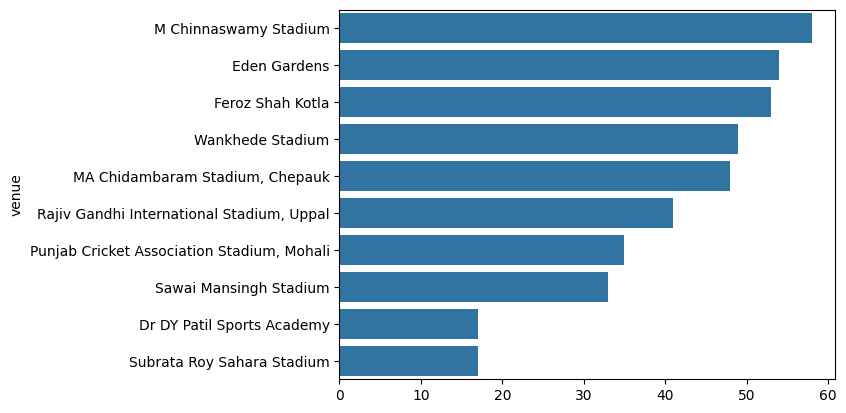

In [91]:
sns.barplot(y=venue_counts.head(10).index, x=venue_counts.head(10).values)

# 7. Umpire Name Cleaning
Clean umpire columns (umpire1, umpire2, umpire3) by:

1)Replacing missing values with "Not Assigned"

2)Removing duplicate umpire names per match

3)Finding the most frequently officiating umpire


In [97]:
print(df['umpire1'].isnull().sum())
print(df['umpire2'].isnull().sum())
print(df['umpire3'].isnull().sum())

0
0
0


In [95]:
df['umpire3'].fillna('Not Assigned')


,umpire3
0,Not Assigned
1,Not Assigned
2,Not Assigned
3,Not Assigned
4,Not Assigned
...,...
572,Not Assigned
573,Not Assigned
574,Not Assigned
575,Not Assigned


In [96]:
print(df['umpire1'].isnull().sum())
print(df['umpire2'].isnull().sum())
print(df['umpire3'].isnull().sum())

0
0
0


In [98]:
umpire1=df['umpire1'].unique
umpire2=df['umpire2'].unique()
umpire3=df['umpire3'].unique()

In [99]:
print(df["umpire1"].head(10))

0    Asad Rauf
1    MR Benson
2    Aleem Dar
3     SJ Davis
4    BF Bowden
5    Aleem Dar
6    IL Howell
7    DJ Harper
8    Asad Rauf
9    Aleem Dar
Name: umpire1, dtype: object


# 8. Create a new text column match_summary by
combining:

team1, team2, winner, and season

Example: “MI vs CSK – MI won in 2019”

Display sample summaries.


In [101]:
pd.set_option('display.max_colwidth', None)
df['Match_Summary'] = df['team1'] + ' vs ' + df['team2'] + ' - ' + df['winner'].astype(str) + ' won in ' + df['season'].astype(str)
print(df['Match_Summary'].head())

0    kolkata knight riders vs royal challengers bangalore - Kolkata Knight Riders won in 2008
1                    chennai super kings vs kings xi punjab - Chennai Super Kings won in 2008
2                         rajasthan royals vs delhi daredevils - Delhi Daredevils won in 2008
3     mumbai indians vs royal challengers bangalore - Royal Challengers Bangalore won in 2008
4                deccan chargers vs kolkata knight riders - Kolkata Knight Riders won in 2008
Name: Match_Summary, dtype: object


# 9. Result Type Text Analysis

Analyze the result column:

Identify different textual result types

Count their occurrences

Visualize the distribution using a count plot

In [102]:
print(df['result'].unique())

['normal' 'tie' 'no result']


In [103]:
print(df['result'].value_counts())

result
normal       568
tie            6
no result      3
Name: count, dtype: int64


<Axes: xlabel='result', ylabel='count'>

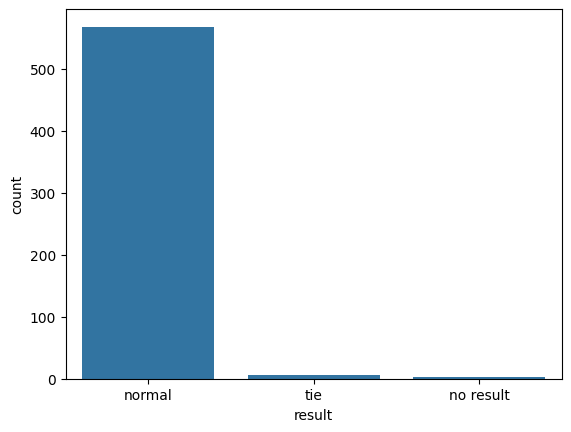

In [104]:
sns.countplot(x=df['result'])

# 10. Toss Winner vs Match Winner (Text Matching)

Compare text values in toss_winner and winner:

Create a boolean column indicating whether the toss winner also won the match

Visualize the comparison using a bar chart


In [107]:
df['toss_decision']=df['toss_winner'].str.strip().str.lower()
df['winner']=df['winner'].str.strip().str.lower()
df['toss_won']=df['toss_winner']==df['winner']
print(df['toss_won'].value_counts())

toss_won
False    577
Name: count, dtype: int64


<Axes: xlabel='toss_won'>

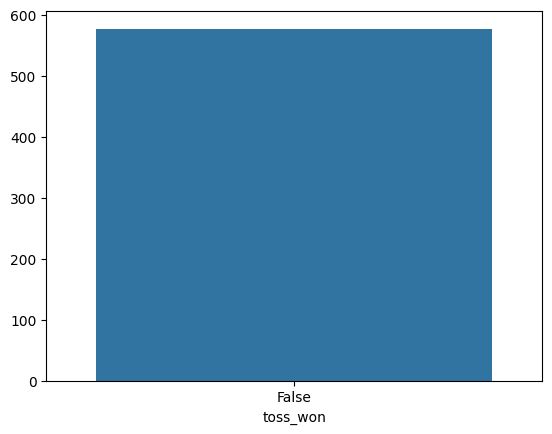

In [108]:
sns.barplot(x=df['toss_won'].value_counts().index, y=df['toss_won'].value_counts().values)